# **<span style="color:orange;">UK Dataset: Exploratory Data Analysis</span>**

## **Purpose of Notebook**
Conducting a EDA analysis on the loaded and cleaned data, checking numerical stats, distributions, target analysis and geographical views

---

**Import Neccessary Libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import prettytable
from collections import Counter

# Display all columns of a pandas DataFrame when printed
pd.set_option('display.max_columns', None)



import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
import numpy as np
import plotly.express as px

**Load the cleaned Datasets**

In [26]:
# US Dataset
US_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Datasets/US-cleaned_data.csv')
US_data.head()


,Report ID,Report Version,Make,Model,Model Year,ADS Equipped?,Automation System Engaged?,Incident Date,Incident Time (24:00),City,State,Roadway Type,Roadway Surface,Posted Speed Limit (MPH),Lighting,Crash With,Highest Injury Severity Alleged,SV Pre-Crash Movement,Weather,SV Contact Area,Country
0,10003-2800,4,International,LT,2022.0,No,"Unknown, see Narrative",2025-11-21,19:57:00,Maxatawny Tounship,PA,Street,Dry,25.0,Dark - Not Lighted,Other Fixed Object,Unknown,Proceeding Straight,Missing,Front,US
1,10003-2932,1,International,LT,2022.0,Yes,"Unknown, see Narrative",2021-11-05,19:57:00,Maxatawny Township,PA,Street,Dry,25.0,Dark - Not Lighted,Other Fixed Object,Unknown,Proceeding Straight,Missing,Front,US
2,10003-3210,1,International,LT625,2021.0,Yes,"Unknown, see Narrative",2022-04-05,15:52:00,Tucson,AZ,Highway / Freeway,Dry,65.0,Daylight,Other Fixed Object,No Injuries Reported,Proceeding Straight,Clear,Front,US
3,10003-4179,1,International,LT,2022.0,No,ADAS,2025-10-22,15:09:00,Missing,MD,Highway / Freeway,Dry,65.0,Daylight,Passenger Car,Unknown,Proceeding Straight,Clear,Front,US
4,10003-6050,2,International,LT625,2022.0,No,"Unknown, see Narrative",2025-12-22,08:20:00,Natural Bridge,VA,Highway / Freeway,Dry,70.0,Daylight,Other Fixed Object,No Injuries Reported,Proceeding Straight,Clear,"Back, Front, Nearside, Offside",US


In [27]:
# UK Dataset
UK_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Datasets/UK-cleaned_data.csv')
UK_data.head()


,Report ID,Report Version,Highest Injury Severity Alleged,Incident Date,Incident Time (24:00),Roadway Type,Posted Speed Limit (MPH),Lighting,Weather,Roadway Surface,SV Pre-Crash Movement,Crash With,SV Contact Area,City,State,Country,Make,Model,Model Year,ADS Equipped?,Automation System Engaged?
0,2019010155206,10155206,Minor,2019-01-01,01:15:00,Single carriageway,30.0,Dark - Lighted,Clear,Single carriageway,Waiting to go - held up,NaN,Front,Chadwell Heath,Greater London,United Kingdom,SUZUKI,SWIFT,2015.0,Conventional,Conventional
1,2019010155217,10155217,Serious,2019-01-01,04:10:00,Dual carriageway,40.0,Dark - Lighted,Clear,Dual carriageway,Going ahead other,Other Fixed Object,Front,Ilford,Greater London,United Kingdom,HYUNDAI,I30,2015.0,Conventional,Conventional
2,2019010155425,10155425,Minor,2019-01-02,15:07:00,Single carriageway,20.0,Daylight,Clear,Single carriageway,Going ahead other,NaN,Front,Stamford Hill,Greater London,United Kingdom,MERCEDES,C CLASS,2018.0,Conventional,Conventional
3,2019010156538,10156538,Minor,2019-01-08,21:20:00,Single carriageway,20.0,Dark - Lighted,Clear,Single carriageway,Going ahead other,NaN,Front,Goodmayes,Greater London,United Kingdom,TOYOTA,AVENSIS,2005.0,Conventional,Conventional
4,2019010156721,10156721,Serious,2019-01-10,08:20:00,Dual carriageway,30.0,Daylight,Clear,Dual carriageway,Going ahead other,NaN,Front,South Norwood,Greater London,United Kingdom,AUDI,A4,2017.0,Conventional,Conventional


**Make Sure columns are the same**

In [28]:
# Printing all columns for both datasets
print("Columns in UK_data:")
print(UK_data.columns)

print("\nColumns in US_data:")
print(US_data.columns)

# Checking if both datasets have the same number of rows and columns
print("\nShape of UK_data:", UK_data.shape)
print("Shape of US_data:", US_data.shape)


Columns in UK_data:
Index(['Report ID', 'Report Version', 'Highest Injury Severity Alleged',
       'Incident Date', 'Incident Time (24:00)', 'Roadway Type',
       'Posted Speed Limit (MPH)', 'Lighting', 'Weather', 'Roadway Surface',
       'SV Pre-Crash Movement', 'Crash With', 'SV Contact Area', 'City',
       'State', 'Country', 'Make', 'Model', 'Model Year', 'ADS Equipped?',
       'Automation System Engaged?'],
      dtype='object')

Columns in US_data:
Index(['Report ID', 'Report Version', 'Make', 'Model', 'Model Year',
       'ADS Equipped?', 'Automation System Engaged?', 'Incident Date',
       'Incident Time (24:00)', 'City', 'State', 'Roadway Type',
       'Roadway Surface', 'Posted Speed Limit (MPH)', 'Lighting', 'Crash With',
       'Highest Injury Severity Alleged', 'SV Pre-Crash Movement', 'Weather',
       'SV Contact Area', 'Country'],
      dtype='object')

Shape of UK_data: (232365, 21)
Shape of US_data: (4372, 21)


**Split the Numerical and Catergorical Columns**

In [29]:
# Identify numerical and categorical columns
numerical_columns = ['Posted Speed Limit (MPH)']
catergorical_columns = [
    'Make', 'Model', 'Model Year', 'ADS Equipped?',
    'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Roadway Surface',
    'Roadway Surface', 'Lighting', 'Crash With', 'Highest Injury Severity Alleged',
    'SV Pre-Crash Movement', 'SV Contact Area', 'Weather', 'Country'
]
datetime_columns = ['Incident Date', 'Incident Time (24:00)']
indexing_columns = ['Report ID', 'Report Version']

**Missing Values**

In [30]:
from prettytable import PrettyTable

# Function to calculate and display missing values
def display_missing_values(dataset, dataset_name):
    features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]
    
    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["Feature", "Percentage of Missing Values"]
    
    for feature in features_with_na:
        missing_percentage = np.round(dataset[feature].isnull().mean() * 100, 2)
        table.add_row([feature, f"{missing_percentage} %"])
    
    print(f"Missing Values in {dataset_name}:")
    print(table)

# Check missing values for both datasets
display_missing_values(UK_data, "UK Dataset")
display_missing_values(US_data, "US Dataset")

Missing Values in UK Dataset:
+------------+------------------------------+
|  Feature   | Percentage of Missing Values |
+------------+------------------------------+
| Crash With |           92.01 %            |
|   Model    |            1.11 %            |
+------------+------------------------------+
Missing Values in US Dataset:
+--------------------------+------------------------------+
|         Feature          | Percentage of Missing Values |
+--------------------------+------------------------------+
|        Model Year        |            0.32 %            |
|      Incident Date       |            0.43 %            |
|  Incident Time (24:00)   |            4.6 %             |
| Posted Speed Limit (MPH) |           11.34 %            |
+--------------------------+------------------------------+


**Are Missing Values correlated with the target variable - severity**

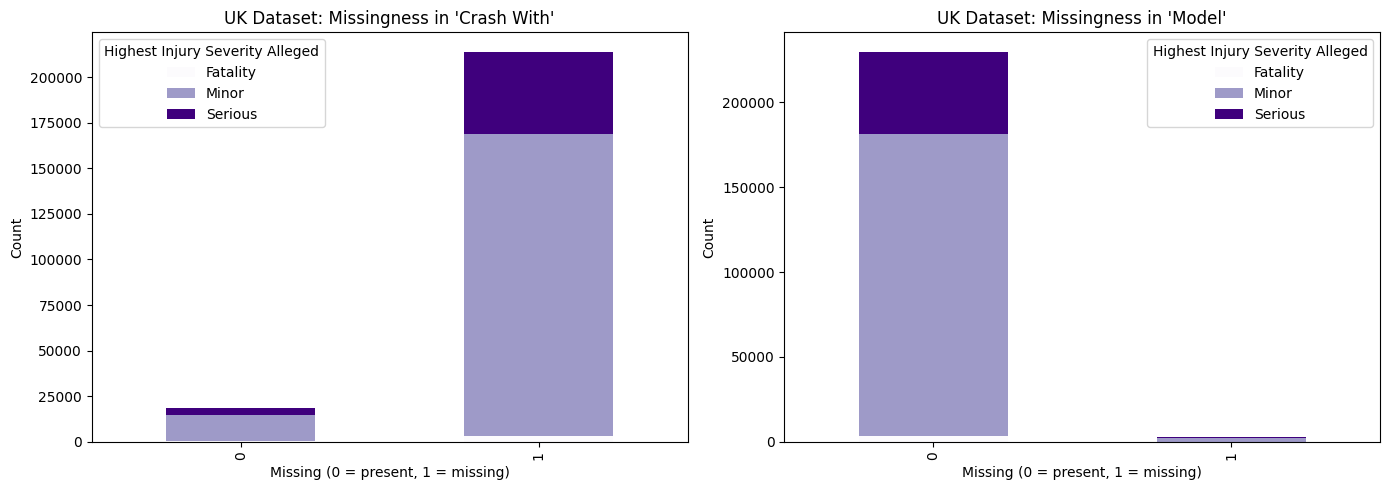

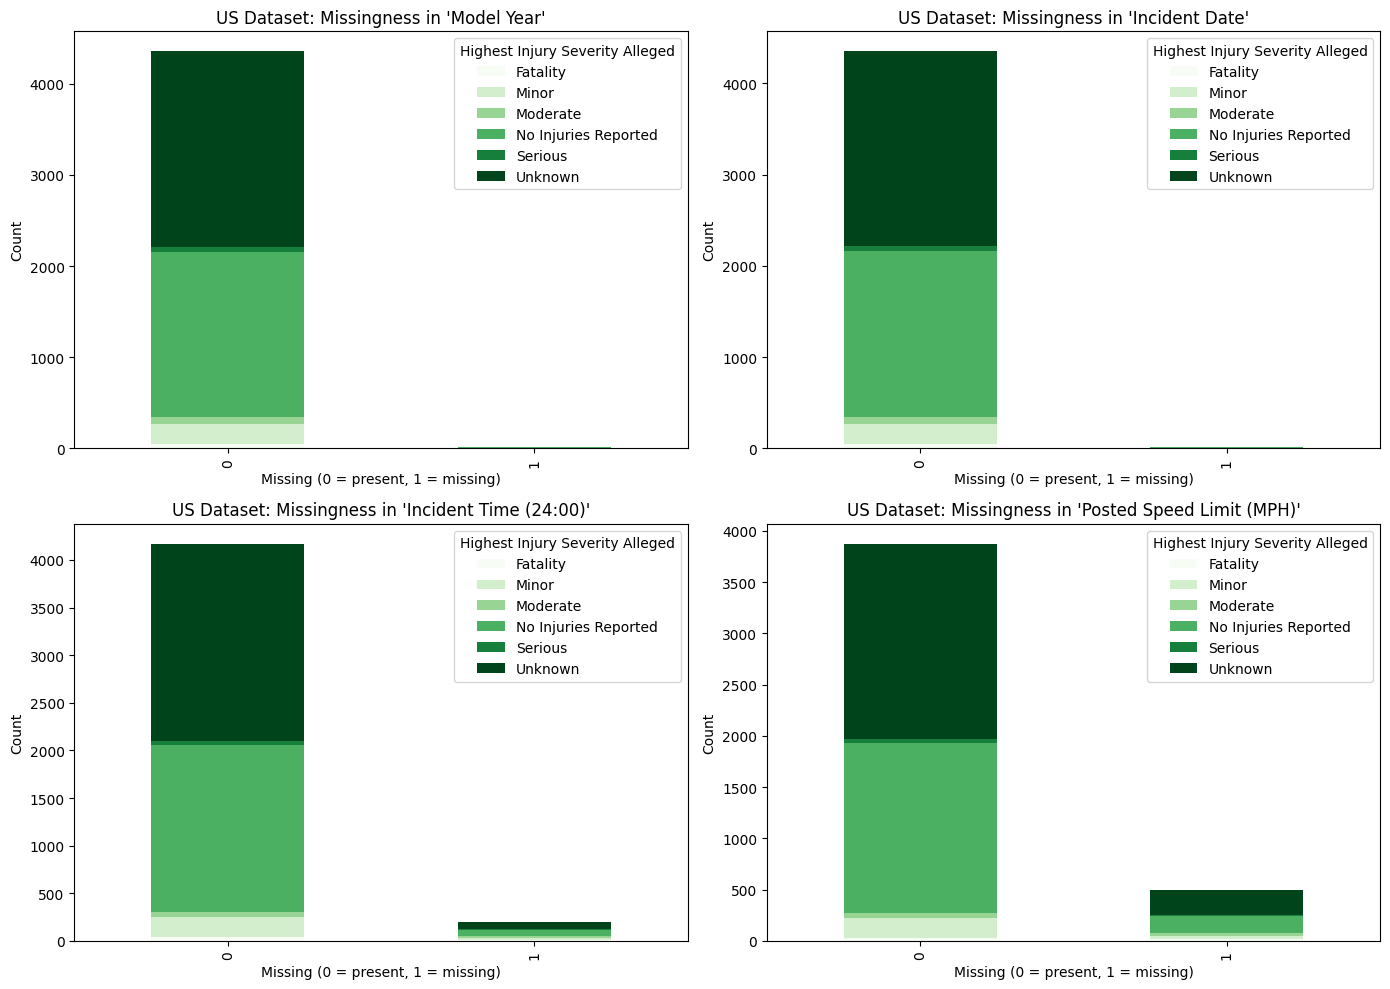

In [31]:

def plot_missing_correlation(dataset, dataset_name, target_variable, color_map):
    features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]
    num_features = len(features_with_na)

    # Set up the grid layout: 2 columns
    cols = 2
    rows = (num_features + cols - 1) // cols  # Ensure all plots fit
    fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(features_with_na):
        data = dataset.copy()
        data[feature + "_missing"] = np.where(data[feature].isnull(), 1, 0)

        # Group by missing flag and target variable
        grouped = data.groupby([feature + "_missing", target_variable]).size().unstack(fill_value=0)

        # Plot stacked bar chart
        grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap=color_map)
        axes[i].set_title(f"{dataset_name}: Missingness in '{feature}'")
        axes[i].set_xlabel("Missing (0 = present, 1 = missing)")
        axes[i].set_ylabel("Count")

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
plot_missing_correlation(UK_data, "UK Dataset", "Highest Injury Severity Alleged", color_map="Purples")
plot_missing_correlation(US_data, "US Dataset", "Highest Injury Severity Alleged", color_map="Greens")


Amount of missing is very low for both, however it is dependent hence we need to replace these nan values with something more meaningful in the feature engineering section

## **<span style="color:#CCCCFF;">Numerical Values</span>**


In [32]:
def show_numerical_features(dataset, dataset_name):
    print(f"\n{dataset_name}")
    print(f"Number of numerical variables: {len(numerical_columns)}")
    print("Preview of numerical variables:")
    print(dataset[numerical_columns].head())


# Apply to both datasets
show_numerical_features(UK_data, "UK Dataset")
show_numerical_features(US_data, "US Dataset")




UK Dataset
Number of numerical variables: 1
Preview of numerical variables:
   Posted Speed Limit (MPH)
0                      30.0
1                      40.0
2                      20.0
3                      20.0
4                      30.0

US Dataset
Number of numerical variables: 1
Preview of numerical variables:
   Posted Speed Limit (MPH)
0                      25.0
1                      25.0
2                      65.0
3                      65.0
4                      70.0


UK report version is not a numerical value as it is a string with chars not numbers only
* Catergorical = Model Year, Report Version (uneccessary)
* Discrete = posted speed limit

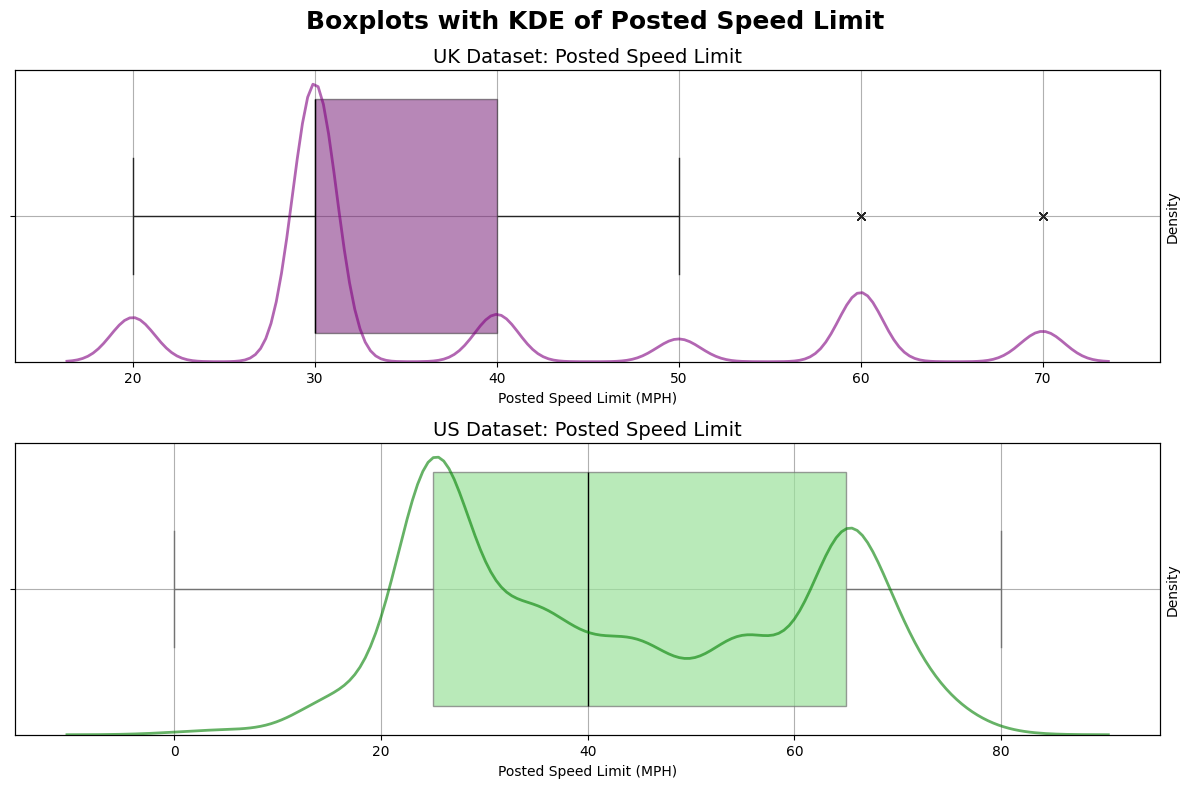

In [33]:

def plot_posted_speed_limit_boxplots(UK_data, US_data):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
    
    # UK plot – pastel purple boxplot
    sns.boxplot(data=UK_data, x='Posted Speed Limit (MPH)', color='purple',
                ax=axes[0], flierprops=dict(marker='x', markersize=6),
                boxprops=dict(alpha=0.5), medianprops=dict(color='black'))
    axes[0].set_title("UK Dataset: Posted Speed Limit", fontsize=14)
    axes[0].grid(True)
    
    # UK KDE overlay on secondary y-axis
    ax2_uk = axes[0].twinx()
    sns.kdeplot(UK_data['Posted Speed Limit (MPH)'].dropna(), color='purple', alpha=0.6, lw=2, ax=ax2_uk)
    ax2_uk.set_ylabel('Density', fontsize=10)
    ax2_uk.grid(False)
    ax2_uk.set_yticks([])
    
    # US plot – pastel mint green boxplot
    sns.boxplot(data=US_data, x='Posted Speed Limit (MPH)', color='lightgreen',
                ax=axes[1], flierprops=dict(marker='x', markersize=6),
                boxprops=dict(alpha=0.7), medianprops=dict(color='black'))
    axes[1].set_title("US Dataset: Posted Speed Limit", fontsize=14)
    axes[1].grid(True)
    
    # US KDE overlay on secondary y-axis
    ax2_us = axes[1].twinx()
    sns.kdeplot(US_data['Posted Speed Limit (MPH)'].dropna(), color='green', alpha=0.6, lw=2, ax=ax2_us)
    ax2_us.set_ylabel('Density', fontsize=10)
    ax2_us.grid(False)
    ax2_us.set_yticks([])
    
    # Super title
    plt.suptitle("Boxplots with KDE of Posted Speed Limit", fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()


# Call the function
plot_posted_speed_limit_boxplots(UK_data, US_data)


## **<span style="color:#CCCCFF;">Catergorical Values</span>**

**KDE and Histograms**

* Too many values taking more than 30mins for the UK dataset hence only plotting top 20 
* counter method for SV contact as multi answers

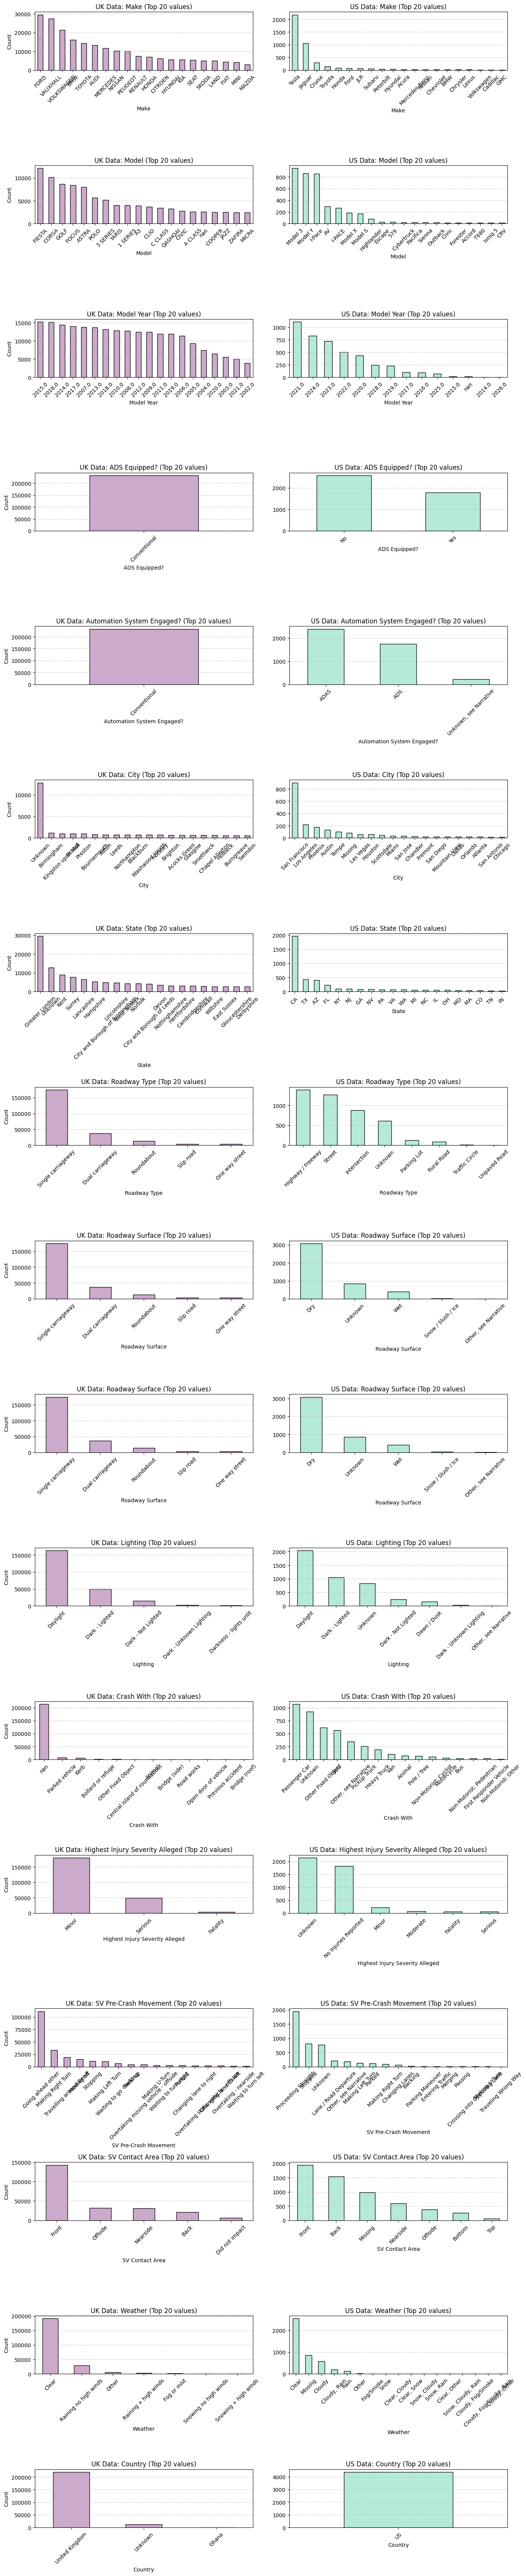

In [34]:

fig, axes = plt.subplots(len(catergorical_columns), 2, figsize=(14, len(catergorical_columns)*4), sharey=False)

if len(catergorical_columns) == 1:
    axes = axes.reshape(1, 2)

for idx, column in enumerate(catergorical_columns):
    if column not in UK_data.columns:
        print(f"Warning: '{column}' not in UK data columns. Skipping.")
        continue
    if column not in US_data.columns:
        print(f"Warning: '{column}' not in US data columns. Skipping.")
        continue
    
    # UK Data bar plot - top 20 values
    uk_counts = UK_data[column].value_counts(dropna=False).head(20)
    uk_counts.plot(kind='bar', ax=axes[idx, 0], color='#CBAACB',edgecolor='black')  # pastel purple
    axes[idx, 0].set_title(f'UK Data: {column} (Top 20 values)')
    axes[idx, 0].set_xlabel(column)
    axes[idx, 0].set_ylabel('Count')
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # US Data bar plot - top 20 values
    if column == 'SV Contact Area':
        area_series = US_data[column].dropna()
        all_areas = []
        for val in area_series:
            parts = [part.strip() for part in val.split(',')]
            all_areas.extend(parts)
        area_counts = Counter(all_areas)
        area_counts_df = pd.Series(area_counts).sort_values(ascending=False).head(20)
        area_counts_df.plot(kind='bar', ax=axes[idx, 1], color='#B5EAD7',edgecolor='black')  # pastel green
    else:
        us_counts = US_data[column].value_counts(dropna=False).head(20)
        us_counts.plot(kind='bar', ax=axes[idx, 1], color='#B5EAD7',edgecolor='black')  # pastel green

    axes[idx, 1].set_title(f'US Data: {column} (Top 20 values)')
    axes[idx, 1].set_xlabel(column)
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## **<span style="color:#CCCCFF;">Time Series Values</span>**

**Radial Time Series Data**

/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_12985/111062564.py:12: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_12985/111062564.py:12: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



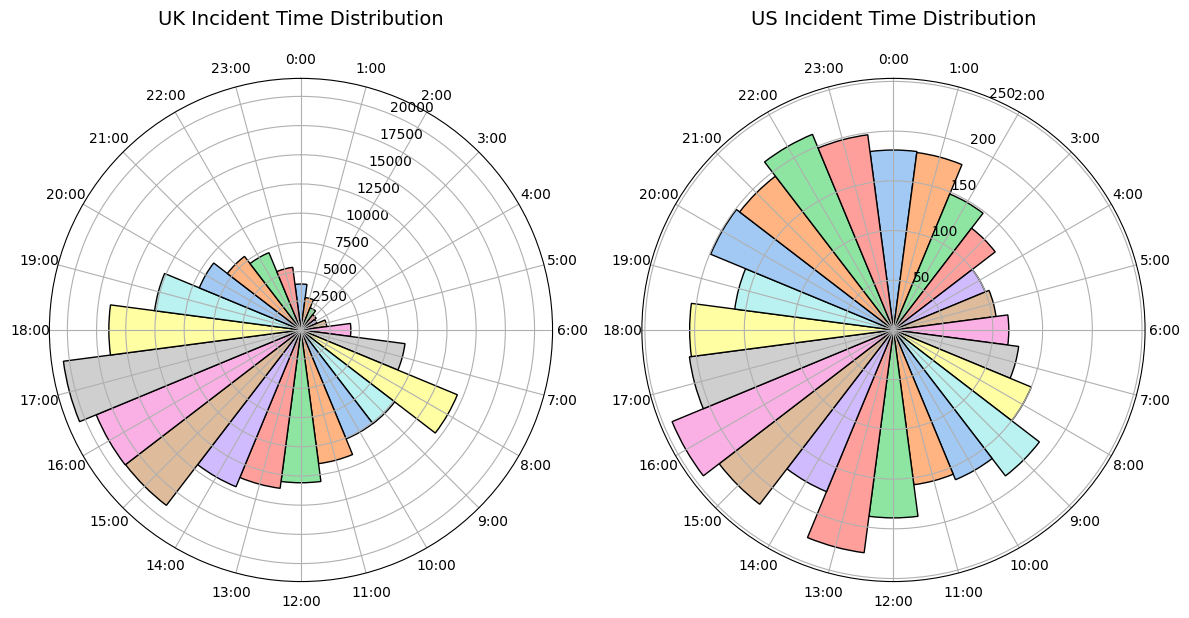

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_incident_time_radial_side_by_side(UK_data, US_data):
    # Make sure Incident Time is datetime or extract hour as integer
    for df in [UK_data, US_data]:
        if 'Incident Time (24:00)' in df.columns:
            # Try to convert to datetime, extract hour
            if not pd.api.types.is_datetime64_any_dtype(df['Incident Time (24:00)']):
                df['Incident Time (24:00)'] = pd.to_datetime(df['Incident Time (24:00)'], errors='coerce').dt.hour
            else:
                df['Incident Time (24:00)'] = df['Incident Time (24:00)'].dt.hour

    # Prepare counts of hours 0-23 for UK
    uk_hours = UK_data['Incident Time (24:00)'].dropna().astype(int)
    uk_counts = uk_hours.value_counts().reindex(range(24), fill_value=0).sort_index()

    # Prepare counts of hours 0-23 for US
    us_hours = US_data['Incident Time (24:00)'].dropna().astype(int)
    us_counts = us_hours.value_counts().reindex(range(24), fill_value=0).sort_index()

    hours = range(24)
    theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)
    width = 2 * np.pi / 24

    fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': 'polar'})

    colors = sns.color_palette('pastel', 24)

    # UK plot
    axes[0].bar(theta, uk_counts, width=width, bottom=0.0, color=colors, edgecolor='black')
    axes[0].set_theta_zero_location("N")
    axes[0].set_theta_direction(-1)
    axes[0].set_xticks(theta)
    axes[0].set_xticklabels([f'{h}:00' for h in hours])
    axes[0].set_title('UK Incident Time Distribution', fontsize=14, pad=20)

    # US plot
    axes[1].bar(theta, us_counts, width=width, bottom=0.0, color=colors, edgecolor='black')
    axes[1].set_theta_zero_location("N")
    axes[1].set_theta_direction(-1)
    axes[1].set_xticks(theta)
    axes[1].set_xticklabels([f'{h}:00' for h in hours])
    axes[1].set_title('US Incident Time Distribution', fontsize=14, pad=20)

    plt.tight_layout()
    plt.show()

plot_incident_time_radial_side_by_side(UK_data, US_data)


**Month and Year Data**

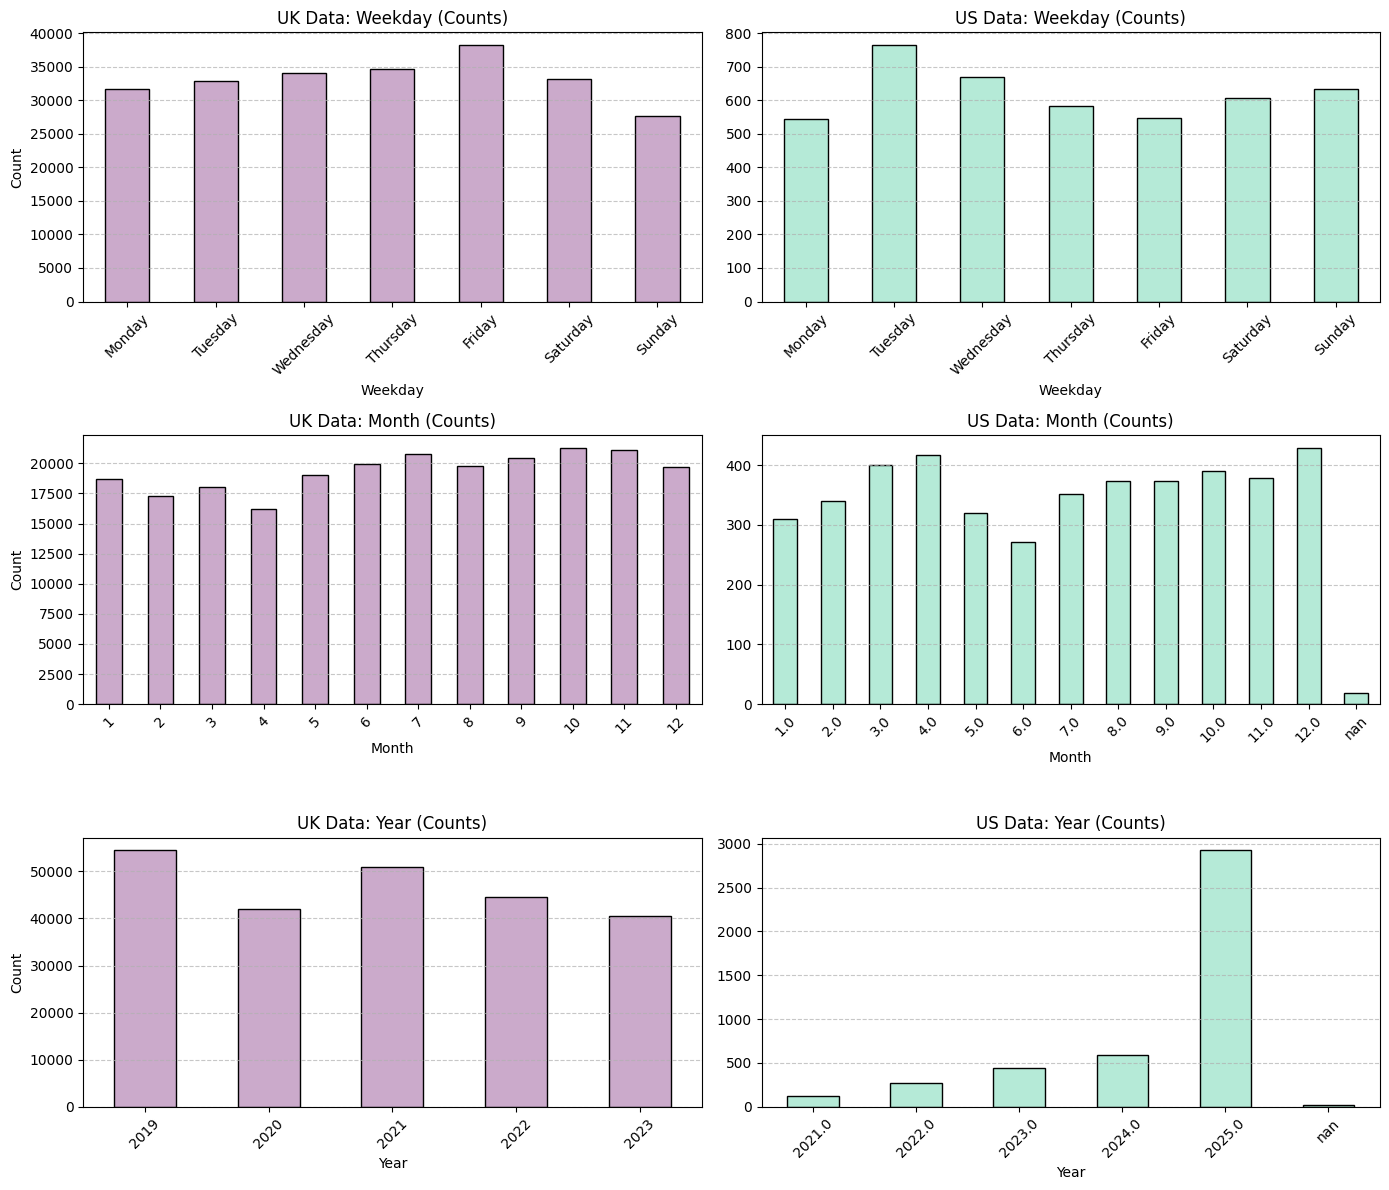

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_weekday_month_year_side_by_side(UK_data, US_data):
    # Convert Incident Date to datetime if needed
    for df in [UK_data, US_data]:
        if 'Incident Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Incident Date']):
            df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')

        # Extract weekday name
        if 'Weekday' not in df.columns:
            df['Weekday'] = df['Incident Date'].dt.day_name()
        # Extract month and year as before
        if 'Month' not in df.columns:
            df['Month'] = df['Incident Date'].dt.month
        if 'Year' not in df.columns:
            df['Year'] = df['Incident Date'].dt.year

    time_columns = ['Weekday', 'Month', 'Year']

    fig, axes = plt.subplots(len(time_columns), 2, figsize=(14, len(time_columns)*4), sharey=False)
    if len(time_columns) == 1:
        axes = axes.reshape(1, 2)

    for idx, column in enumerate(time_columns):
        # UK plot
        uk_counts = UK_data[column].value_counts(dropna=False)
        if column == 'Weekday':
            # Reorder weekdays for better readability
            weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            uk_counts = uk_counts.reindex(weekdays_order).fillna(0)
        else:
            uk_counts = uk_counts.sort_index()

        uk_counts.plot(kind='bar', ax=axes[idx, 0], color='#CBAACB',edgecolor='black')
        axes[idx, 0].set_title(f'UK Data: {column} (Counts)')
        axes[idx, 0].set_xlabel(column)
        axes[idx, 0].set_ylabel('Count')
        axes[idx, 0].tick_params(axis='x', rotation=45)
        axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)

        # US plot
        us_counts = US_data[column].value_counts(dropna=False)
        if column == 'Weekday':
            us_counts = us_counts.reindex(weekdays_order).fillna(0)
        else:
            us_counts = us_counts.sort_index()

        us_counts.plot(kind='bar', ax=axes[idx, 1], color='#B5EAD7',edgecolor='black')
        axes[idx, 1].set_title(f'US Data: {column} (Counts)')
        axes[idx, 1].set_xlabel(column)
        axes[idx, 1].tick_params(axis='x', rotation=45)
        axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Usage:
plot_weekday_month_year_side_by_side(UK_data, US_data)


# **<span style="color:yellow">Geospartial Analysis</span>**

## **<span style="color:#CCCCFF;">US Chloropleth Map</span>**

In [37]:
"""
    Reference: https://plotly.com/python/county-choropleth/
"""
import pandas as pd
import plotly.express as px

def plot_us_state_choropleth(US_data):
    # Clean 'State' column: remove whitespace, uppercase
    US_data['State'] = US_data['State'].astype(str).str.strip().str.upper()

    # Count occurrences per state
    state_counts = US_data['State'].value_counts().reset_index()
    state_counts.columns = ['State', 'Count']

    # Create choropleth map
    fig = px.choropleth(
        state_counts,
        locations='State',
        locationmode='USA-states',
        color='Count',
        color_continuous_scale='Blues',
        scope='usa',
        title='Choropleth Map of US States by Incident Count'
    )

    fig.show()
plot_us_state_choropleth(US_data)


**California Map**

In [38]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import json
import requests

# Load your crash data CSV (replace with your actual data file)
df = US_data.copy()  # Use US_data for this example

# Filter data for California only (state abbreviation CA)
df_ca = df[df['State'].str.upper() == 'CA']

# Load geojson for California counties
# This is from Plotly's repository example for US counties
geojson_url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
geojson_data = requests.get(geojson_url).json()

# We only want counties in California (FIPS codes starting with '06')
ca_counties_geojson = {
    "type": "FeatureCollection",
    "features": [feature for feature in geojson_data['features'] if feature['id'].startswith('06')]
}

# Now aggregate crash counts by county name (assumed 'County' column)
county_counts = df_ca['City'].str.title().value_counts().reset_index()
county_counts.columns = ['City', 'Count']

# Map county names to FIPS codes (from geojson)
county_fips = {}
for feature in ca_counties_geojson['features']:
    name = feature['properties']['NAME']
    fips = feature['id']
    county_fips[name] = fips

# Add FIPS code to counts dataframe
county_counts['fips'] = county_counts['City'].map(county_fips)

# Remove any counties without FIPS code mapping (to avoid errors)
county_counts = county_counts.dropna(subset=['fips'])

app = Dash(__name__)

app.layout = html.Div([
    html.H4('California County Crash Counts'),
    dcc.Graph(id='choropleth-county'),
])

@app.callback(
    Output('choropleth-county', 'figure'),
    Input('choropleth-county', 'id')  # dummy input to trigger once
)
def plot_california_counties(_):
    fig = px.choropleth(
        county_counts,
        geojson=ca_counties_geojson,
        locations='fips',
        color='Count',
        color_continuous_scale='Blues',
        scope='usa',
        labels={'Count': 'Crash Count'},
        hover_name='City',
        hover_data={'fips': False}
    )
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0},
                      title_text='California Crash Counts by County')
    return fig

if __name__ == '__main__':
    app.run(debug=True)


## **<span style="color:#CCCCFF;">UK Chloropleth Map</span>**

**World Map**

In [39]:
import plotly.graph_objects as go
import pandas as pd
import pycountry

# Load your crash data (assumes 'Country' column exists)
df = UK_data
# Count crashes by country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Crashes']

# Map country names to ISO-3 codes (e.g., 'United Kingdom' → 'GBR')
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

country_counts['ISO_Code'] = country_counts['Country'].apply(get_country_code)

# Drop countries with unknown codes
country_counts = country_counts.dropna(subset=['ISO_Code'])

# Plot choropleth
fig = go.Figure(data=go.Choropleth(
    locations=country_counts['ISO_Code'],
    z=country_counts['Crashes'],
    text=country_counts['Country'],
    colorscale='Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Crashes',
))

fig.update_layout(
    title_text='Crash Frequency by Country',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()


- Some values shown in ghana this may be the missing data being used as 0,0 ghana

In [40]:
import pandas as pd

# Get unique cities
unique_cities = UK_data['City'].unique()

# Convert to DataFrame for a clean table printout
unique_cities_df = pd.DataFrame(unique_cities, columns=['Unique Cities'])

print("Unique UK Counties (Cities):")
print(unique_cities_df)


Unique UK Counties (Cities):
       Unique Cities
0     Chadwell Heath
1             Ilford
2      Stamford Hill
3          Goodmayes
4      South Norwood
...              ...
4205        Talysarn
4206       Rhosneigr
4207        Trefnant
4208      Llanfynydd
4209   Vale of Leven

[4210 rows x 1 columns]


**UK Map**

In [43]:
# Extract LAD names from GeoJSON
import pandas as pd
from urllib.request import urlopen
import json
import plotly.express as px

# Load LAD GeoJSON (Local Authority Districts)
with urlopen('https://raw.githubusercontent.com/thomasvalentine/Choropleth/main/Local_Authority_Districts_(December_2021)_GB_BFC.json') as response:
    Local_authorities = json.load(response)

lad_names = [feature['properties']['LAD21NM'] for feature in Local_authorities['features']]

# Define function to clean names by removing common prefixes
def clean_name(name):
    prefixes = [
        'City and Borough of ', 'Borough of ', 'County of ', 'District of ', 'Royal Borough of '
    ]
    for prefix in prefixes:
        if name.startswith(prefix):
            return name[len(prefix):]
    return name

# Clean LAD names
cleaned_lad_names = [clean_name(name) for name in lad_names]

# Clean 'State' column in uk_data
UK_data['Clean_State'] = UK_data['State'].apply(clean_name)

# Find rows where cleaned State is not in cleaned LAD names
no_match_rows = UK_data[~UK_data['Clean_State'].isin(cleaned_lad_names)]

# Get unique unmatched cleaned State names
unique_no_match_states = no_match_rows['Clean_State'].unique()

print("Unique State names with no matching LAD (after cleaning):")
print(unique_no_match_states)


Unique State names with no matching LAD (after cleaning):
['Greater London' 'Surrey' 'Hertfordshire' 'Essex' 'Kent' 'Lancashire'
 'Unknown' 'Secondi Takoradi' 'North Yorkshire' 'Cumbria'
 'Metropolitan Borough of Wirral' 'Staffordshire' 'The Scottish Borders'
 'City of York' 'Derbyshire' 'Nottinghamshire'
 'City of Kingston upon Hull' 'Lincolnshire' 'Worcestershire'
 'Warwickshire' 'Herefordshire' 'Gloucestershire' 'Sir Powys'
 'Leicestershire' 'Oxfordshire' 'City of Leicester' 'Cambridgeshire'
 'Norfolk' 'Suffolk' 'Hampshire'
 'Bournemouth, Christchurch and Poole Council' 'West Sussex' 'East Sussex'
 'Devon' 'Somerset' 'City of Bristol' 'Caerphilly County Borough'
 'Torfaen County Borough' 'Bridgend county borough'
 'City and County of Swansea' 'Merthyr Tydfil County Borough'
 'Eilean Siar' 'Anglesey']


In [49]:
# Step 2: Manual mapping dictionary for known naming differences
# https://public.opendatasoft.com/explore/dataset/georef-united-kingdom-local-authority-district/table/?disjunctive.ctry_name&disjunctive.rgn_name&disjunctive.ctyua_name&disjunctive.lad_name
manual_map = {}
manual_map.update({
    'Surrey': 'Surrey Heath',
    'Hertfordshire': 'East Hertfordshire',
    'Essex': 'Thurrock',
    'Kent': 'Dartford',
    'Lancashire': 'West Lancashire',
    'North Yorkshire': 'East Riding of Yorkshire',
    'Cumbria': 'Barrow-in-Furness',
    'Staffordshire': 'Staffordshire Moorlands',
    'Derbyshire': 'Derbyshire Dales',
    'Nottinghamshire': 'Ashfield',
    'City of Kingston upon Hull': "East Riding of Yorkshire",
    'Lincolnshire': 'North Lincolnshire',
    'Worcestershire': 'Bromsgrove',
    'Warwickshire': 'Warwick',
    'Herefordshire': 'Herefordshire, County of',
    'Gloucestershire': 'South Gloucestershire',
    'Leicestershire': 'North West Leicestershire',
    'Oxfordshire': 'Oxford',
    'Cambridgeshire': 'Cambridge',
    'Norfolk': "King's Lynn and West Norfolk",
    'Suffolk': 'Mid Suffolk',
    'Hampshire': 'East Hampshire',
    'West Sussex': 'Mid Sussex',
    'East Sussex': 'Mid Sussex',
    'Devon': 'Mid Devon',
    'Somerset': 'Somerset West and Taunton',
    'Bristol': 'Bristol, City of',
    'Anglesey': 'Isle of Anglesey',
    'Greater London': 'City of London',
    'Metropolitan Borough of Wirral': 'Wirral',
    'The Scottish Borders': 'Scottish Borders',
    'City of York': 'York',
    'Sir Powys': 'Powys',
    'City of Leicester': 'Leicester',
    'Bournemouth, Christchurch and Poole Council': 'Bournemouth, Christchurch and Poole',
    'City of Bristol': 'Bristol, City of',
    'Caerphilly County Borough': 'Caerphilly',
    'Torfaen County Borough': 'Torfaen',
    'Bridgend county borough': 'Bridgend',
    'City and County of Swansea': 'Swansea',
    'Merthyr Tydfil County Borough': 'Merthyr Tydfil',
    'Eilean Siar': 'Na h-Eileanan Siar',


})

# Non-UK or invalid states to exclude
non_uk = ['Unknown', 'Secondi Takoradi']

# Function to apply manual mapping, fallback to original name
def manual_correction(name):
    return manual_map.get(name, name)
uk_data = UK_data.copy()
# Apply manual mapping to cleaned State names
uk_data['State'] = uk_data['Clean_State'].apply(manual_correction)
# Define your renaming dictionary first
Renaming_mapping = {
    # add any existing mappings here if needed, or leave empty
}


# Filter out non-UK and unknown states
filtered_data = uk_data[~uk_data['State'].isin(non_uk)]

# Prepare cleaned LAD names set for quick lookup
cleaned_lad_names_set = set(cleaned_lad_names)

# Find rows where corrected State still doesn't match any LAD name
no_match_final = filtered_data[~filtered_data['State'].isin(cleaned_lad_names_set)]

# Print unique unmatched corrected states after manual mapping
print("Final unmatched states after manual corrections and filtering:")
print(no_match_final['State'].unique())

# update the dataframe with the corrected state names
uk_data['State'] = uk_data['Clean_State'].apply(manual_correction)

Final unmatched states after manual corrections and filtering:
[]


Went through https://raw.githubusercontent.com/thomasvalentine/Choropleth/main/Local_Authority_Districts_(December_2021)_GB_BFC.json and manually wrote the names that didnt match

In [50]:
# Step 0: Ensure LAD names and mapping IDs are ready
lad_names = [feature['properties']['LAD21NM'] for feature in Local_authorities['features']]
lad_name_set = set(lad_names)

# Add 'id' for Plotly compatibility
for feature in Local_authorities["features"]:
    feature['id'] = feature['properties']['LAD21NM']

# Step 1: Ensure uk_data has corrected State values (already done earlier)
#         If not, apply: uk_data['State'] = uk_data['Clean_State'].apply(manual_correction)

# Step 2: Remove non-UK and invalid states (if not done)
uk_data = uk_data[~uk_data['State'].isin(non_uk)]

# Step 3: Aggregate crash counts by LAD-mapped State
agg_state = uk_data.groupby('State').size().reset_index(name='Crash_Count')

# Step 4: Keep only states that match valid LADs
agg_state_matched = agg_state[agg_state['State'].isin(lad_name_set)]

# Step 5: Filter crash records that fall within matched LADs
plotted_rows = uk_data[uk_data['State'].isin(agg_state_matched['State'])]

# Step 6: Print only the number of crash records plotted
print(f"Number of crash records plotted: {len(plotted_rows)}")

# Step 7: Plot only if there’s data to show
if not agg_state_matched.empty:
    fig = px.choropleth_map(
        agg_state_matched,
        geojson=Local_authorities,
        locations='State',
        color='Crash_Count',
        featureidkey="properties.LAD21NM",
        color_continuous_scale="Viridis",
        map_style="carto-positron",
        center={"lat": 55.09621, "lon": -4.0286298},
        zoom=4.2,
        labels={'Crash_Count': 'Number of Crashes'}
    )
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.show()
else:
    print("No matching LADs found to plot.")

# Step 8: Diagnostic Summary (optional)
total_rows = len(uk_data)
unplotted_rows = total_rows - len(plotted_rows)
print(f"Total crash records: {total_rows}")
print(f"Plotted crash records: {len(plotted_rows)}")
print(f"Unplotted crash records: {unplotted_rows}")

# Step 8: Diagnostic Summary
total_rows = len(uk_data)
plotted_rows_count = len(plotted_rows)
unplotted_rows_count = total_rows - plotted_rows_count

print(f"Total crash records: {total_rows}")
print(f"Plotted crash records: {plotted_rows_count}")
print(f"Unplotted crash records: {unplotted_rows_count}")

# Find all unique states in data
all_states = set(uk_data['State'].unique())

# Find matched states that were plotted
matched_states = set(agg_state_matched['State'].unique())

# States that are in the data but NOT matched to LADs (hence not plotted)
unplotted_states = all_states - matched_states

if unplotted_states:
    print("States not plotted because they did not match any LAD:")
    for state in sorted(unplotted_states):
        print(f"- {state}")
else:
    print("All states matched and plotted.")


Number of crash records plotted: 219485


Total crash records: 219485
Plotted crash records: 219485
Unplotted crash records: 0
Total crash records: 219485
Plotted crash records: 219485
Unplotted crash records: 0
All states matched and plotted.


# **<span style="color:yellow">Bi Variate Analysis </span>**

## **<span style="color:pink">Severity plots </span>**